In [9]:
import sys
# Add the ptdraft folder path to the sys.path list
sys.path.append('../Augmentor/')
sys.path.append('../generate_license_plates-master/')

In [10]:
from generate import generateNumber
import Augmentor
import cv2
import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt

In [11]:
%matplotlib inline

In [12]:
def saturate(image, min_sat, max_sat):
    severity = np.random.uniform(min_sat, max_sat)
    img_speck = (image + severity)
    img_speck[img_speck > 255] = 255
    img_speck[img_speck <= 0] = 0
    img_speck = np.array(img_speck.astype(np.int32))
    return img_speck

In [13]:
def speckle(img):
    severity = np.random.uniform(0, 1) * 255
    blur = ndimage.gaussian_filter(np.random.randn(*img.shape) * severity, 3, truncate=10)
    img_speck = (img + blur)
    img_speck[img_speck > 255] = 255
    img_speck[img_speck <= 0] = 0
    img_speck = np.array(img_speck.astype(np.int32))
    return img_speck

In [14]:
# p.flip_top_bottom(probability=0.1)
def aug(w,h):
    p = Augmentor.Pipeline()
    
    width = int(w*1.7)
    height = int(h*1.7)
    p.zoom(probability=1, min_factor=0.6, max_factor=0.7)
    p.skew_tilt(probability=0.5,magnitude=0.4)
    p.rotate(probability=0.5, max_left_rotation=5, max_right_rotation=5)

    width = w//5
    height = h//5
    p.random_distortion(0.25, grid_width=width, grid_height=height, magnitude=1)
    
    width = w//1
    height = h//1
    p.random_distortion(0.25, grid_width=width, grid_height=height, magnitude=1)
    p.shear(probability=0.5, max_shear_left=5, max_shear_right=5)
    
    return p

In [ ]:
def gen_image(image_path, w, h):
    img = cv2.imread(image_path)
    try:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    except:
        img = cv2.imread(image_path, 0)#img = cv2.cvtColor(img, 0)
        
    img = cv2.resize(img, (w, h))
    img = saturate(img, -200, 200)
    img = speckle(img)
    p = aug(w,h)
    
    img = p.sample_with_array(img)
    
#     img = np.asarray(p.sample_with_array(img))
#     img = img.astype(np.float32)
#     img /= 255
    return img

In [ ]:
img, text = generateNumber()
# cv2.imread(img, 0)
img_array = np.asarray(bytearray(img), dtype=np.uint8)
img = cv2.imdecode(img_array, 0)
print(text)
print(img.shape)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img = cv2.resize(img, (296, 96))
img = saturate(img, -200, 200)
img = speckle(img)
p = aug(296,96)

img = p.sample_with_array(img)
plt.imshow(img)

In [ ]:
a = gen_image(path, 296,96)
plt.imshow(a)

In [ ]:
a = gen_image("/Users/vladimir/temp/numbers/recognition/train296x96/A000AA 00_2.png", 296,96)
cv2.imwrite("/Users/vladimir/temp/numbers/recognition/1.png", np.array(a))

In [ ]:
a = gen_image("/Users/vladimir/temp/numbers/recognition/1.png", 296,96)
plt.imshow(a)

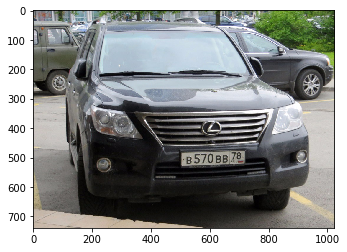

In [121]:
img = cv2.imread("/Users/vladimir/temp/numbers/recognition/image_0004.JPEG")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [122]:
img_w = img.shape[1]
img_h = img.shape[0]

In [123]:
center_x_orig = 0.594727   
center_y_orig = 0.680650
w_orig = 0.220703
h_orig = 0.089310

In [124]:
w = int(w_orig * img_w) // 2
h = int(h_orig * img_h) // 2
x1 = int(center_x_orig * img_w) -w
y1 = int(center_y_orig * img_h) -h
x2 = int(center_x_orig * img_w) +w
y2 = int(center_y_orig * img_h) +h


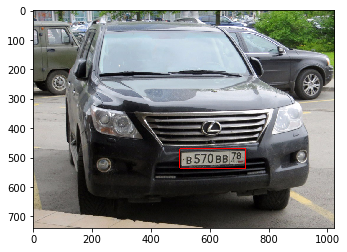

In [151]:
img2 = cv2.rectangle(img.copy(), (x1,y1), (x2,y2), color=(255,0,0), thickness = 2 )
plt.imshow(img2)

In [184]:
offsetLeft = int(np.random.uniform(0, 1) * 100)
offsetRight = int(np.random.uniform(0, 1) * 100)
offsetTop = int(np.random.uniform(0, 1) * 100)
offsetBottom = int(np.random.uniform(0, 1) * 100)
offsetLeft, offsetRight, offsetTop, offsetBottom

(13, 83, 22, 58)

In [185]:
crop_y1 = max(0, y1 - offsetTop)
crop_y2 = min(img.shape[0], y2+offsetBottom)
crop_x1 = max(0, x1 - offsetLeft)
crop_x2 = min(img.shape[1], x2+offsetRight)

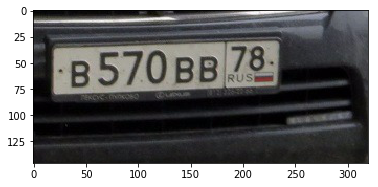

In [186]:
img3 = img[crop_y1: crop_y2 , crop_x1: crop_x2]
# img3 = cv2.resize(img3, (800, 600))
plt.imshow(img3)

In [187]:
new_img_w = img3.shape[1]
new_img_h = img3.shape[0]
new_img_w, new_img_h

(320, 146)

In [192]:
new_center_x_orig = 1 - 0.5 * ((offsetRight - offsetLeft + new_img_w)/ new_img_w) #* (offsetLeft - offsetRight) #center_x_orig * (new_img_w / img_w)
new_center_y_orig = 1 - 0.5 * ((offsetBottom - offsetTop + new_img_h)/ new_img_h) #center_y_orig * (new_img_h / img_h)
new_center_x_orig, new_center_y_orig 

(0.390625, 0.37671232876712324)

In [193]:
new_w_orig = w_orig * (img_w / new_img_w)
new_h_orig = h_orig * (img_h / new_img_h)
new_w_orig, new_h_orig

(0.7062496, 0.4520554109589041)

In [194]:
new_w = int(new_w_orig * new_img_w) // 2
new_h = int(new_h_orig * new_img_h) // 2
new_x1 = int(new_center_x_orig * new_img_w) -new_w
new_y1 = int(new_center_y_orig * new_img_h) -new_h
new_x2 = int(new_center_x_orig * new_img_w) +new_w
new_y2 = int(new_center_y_orig * new_img_h) +new_h

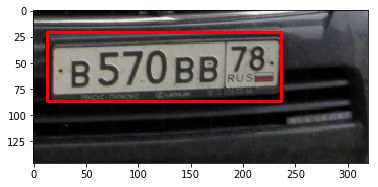

In [195]:
img4 = cv2.rectangle(img3.copy(), (new_x1,new_y1), (new_x2,new_y2), color=(255,0,0), thickness = 2 )
plt.imshow(img4)